<a href="https://colab.research.google.com/github/anandhuarjuna/Data-Science/blob/main/Chronic_heart_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1085
           1       0.00      0.00      0.00       187

    accuracy                           0.85      1272
   macro avg       0.43      0.50      0.46      1272
weighted avg       0.73      0.85      0.78      1272

85.22012578616352


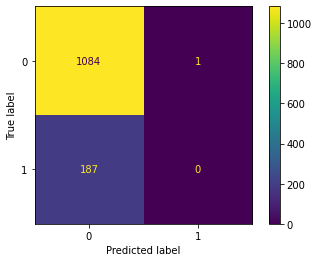

In [ ]:

import pandas as pd
df=pd.read_csv('/content/framingham.csv')
df.dtypes
df.isna().sum()
df.drop(['education'],axis=1,inplace=True)
df.isna().sum()
x=df['cigsPerDay'].mode()[0]
x
df['cigsPerDay']=df['cigsPerDay'].fillna(x)
df.isna().sum()
df['BPMeds'].value_counts()
x=df['BPMeds'].mode()[0]
df['BPMeds']=df['BPMeds'].fillna(x)
df.isna().sum()
df['totChol'].value_counts()   #this is filled using mean as it has floating points
y=df['totChol'].mean()
df['totChol']=df['totChol'].fillna(y)
df.isna().sum()
df['BMI'].value_counts()
df['BMI']=df['BMI'].fillna(df['BMI'].mean())
df['heartRate'].value_counts()
df['heartRate']=df['heartRate'].fillna(df['heartRate'].mode()[0])
df['glucose'].value_counts()
df['glucose']=df['glucose'].fillna(df['glucose'].mode()[0])
df.isna().sum()
df.shape
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values
y
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3,random_state=1)
X_train.shape
X_test.shape
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
sc.fit(X_train)
X_train_new=sc.transform(X_train)
X_test_new=sc.transform(X_test)
from sklearn.svm import SVC
clf=SVC()
clf.fit(X_train_new,y_train)
y_pred=clf.predict(X_test_new)
y_pred
from sklearn.metrics import classification_report,accuracy_score,ConfusionMatrixDisplay
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred)*100)
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))